In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context(rc={"grid.linewidth": 4})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
cmap = plt.get_cmap("tab10")

In [3]:
fs=40
ls=20
lw=4

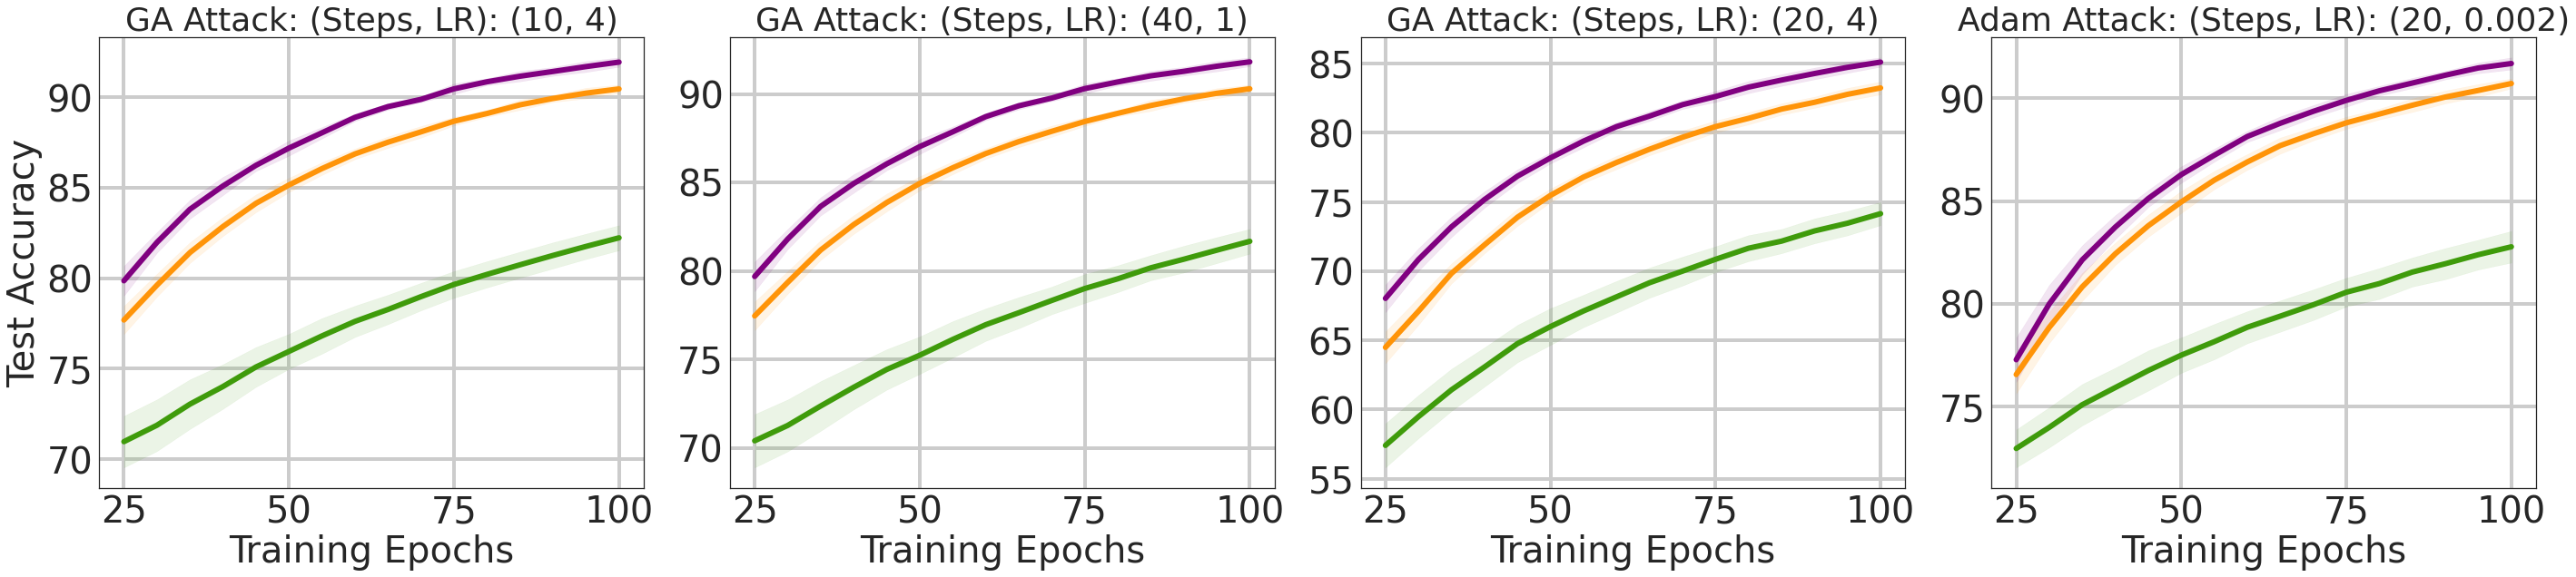

In [16]:
sims = ['minmax_10_1_normal_sgd_100', 'minmax_10_1_no_higher_sgd_100', 'minmax_10_1_higher_sgd_100']
directories = [os.path.join(os.getcwd(), 'results', alg) for alg in sims]
epoch_list = range(25, 105, 5)
fig, ax = plt.subplots(1, 4, figsize=(40, 9))


for point in range(4):
    min_val = 100
    max_val = 0
    for i, directory in enumerate(directories):
        plot_data_list = []
        for seed in range(1, 6):
            plot_data = []
            # get the data for the pull epoch for the sim
            for epoch_num in epoch_list:
                if point == 0  or point == 2:
                    fi = 'attack_results_' + str(epoch_num) 
                elif point == 1:
                    fi = 'budget_attack_results_' + str(epoch_num) 
                elif point == 3:
                    fi = 'budget_adam_attack_results_' + str(epoch_num) 
                data = pickle.load(open(os.path.join(directory+'_seed_'+str(seed), 'attack_results', fi), 'rb'))
                
                if point == 0:
                    plot_data.append(data['gd'][1][1])                
                elif point == 2:
                    plot_data.append(data['gd'][1][point])
                elif point == 1:
                    plot_data.append(data['gd'][2][0])
                elif point == 3:
                    plot_data.append(data['adam'][2][1])

            plot_data_list.append(np.array(plot_data))
        plot_data = np.vstack(plot_data_list).mean(axis=0)
        plot_data_std = np.vstack(plot_data_list).std(axis=0)
        if i == 2: color='purple'
        if i== 1: color='xkcd:tangerine'
        if i== 0: color='xkcd:grass green'
        ax[point].plot(epoch_list, plot_data, label=directory.split('/')[-2], lw=lw*1.5, color=color)
        ax[point].fill_between(epoch_list, plot_data-plot_data_std, plot_data+plot_data_std, color=color, alpha=.1)
        min_val = min(min_val, np.min(plot_data))
        max_val = max(max_val, np.max(plot_data))
    ax[point].set_xlabel('Training Epochs', fontsize=fs)
#     ax[point].set_title("GA Attack: %s Inner Steps"%str(data['gd'][0][point]), fontsize=fs)

    if point == 0:
        ax[point].set_title("GA Attack: (Steps, LR): (%s, %s)"%(str(data['gd'][0][1]), str(4)), fontsize=int(fs/1.1))    
    elif point == 2:
        ax[point].set_title("GA Attack: (Steps, LR): (%s, %s)"%(str(data['gd'][0][point]), str(4)), fontsize=int(fs/1.1))
    elif point == 1:
        ax[point].set_title("GA Attack: (Steps, LR): (%s, %s)"%(str(data['gd'][1][0]), str(data['gd'][0][0])), fontsize=int(fs/1.1))
    elif point == 3:
        ax[point].set_title("Adam Attack: (Steps, LR): (%s, %s)"%(str(data['adam'][1][1]), str(data['adam'][0][1])), fontsize=int(fs/1.1))
    ax[point].tick_params(labelsize=fs)
    ax[point].set_xticks([25, 50, 75, 100])
    ax[point].set_yticks(np.arange(5*round(min_val/5), 5*round(max_val/5)+5, 5))
#         ax[point].set_ylim([60, 100])
#plt.legend()
ax[0].set_ylabel("Test Accuracy", fontsize=fs)
plt.subplots_adjust(wspace=.05, hspace=0)
plt.tight_layout()
plt.savefig('attack_results_all_small.png', bbox_inches='tight', dpi=200)
plt.show()

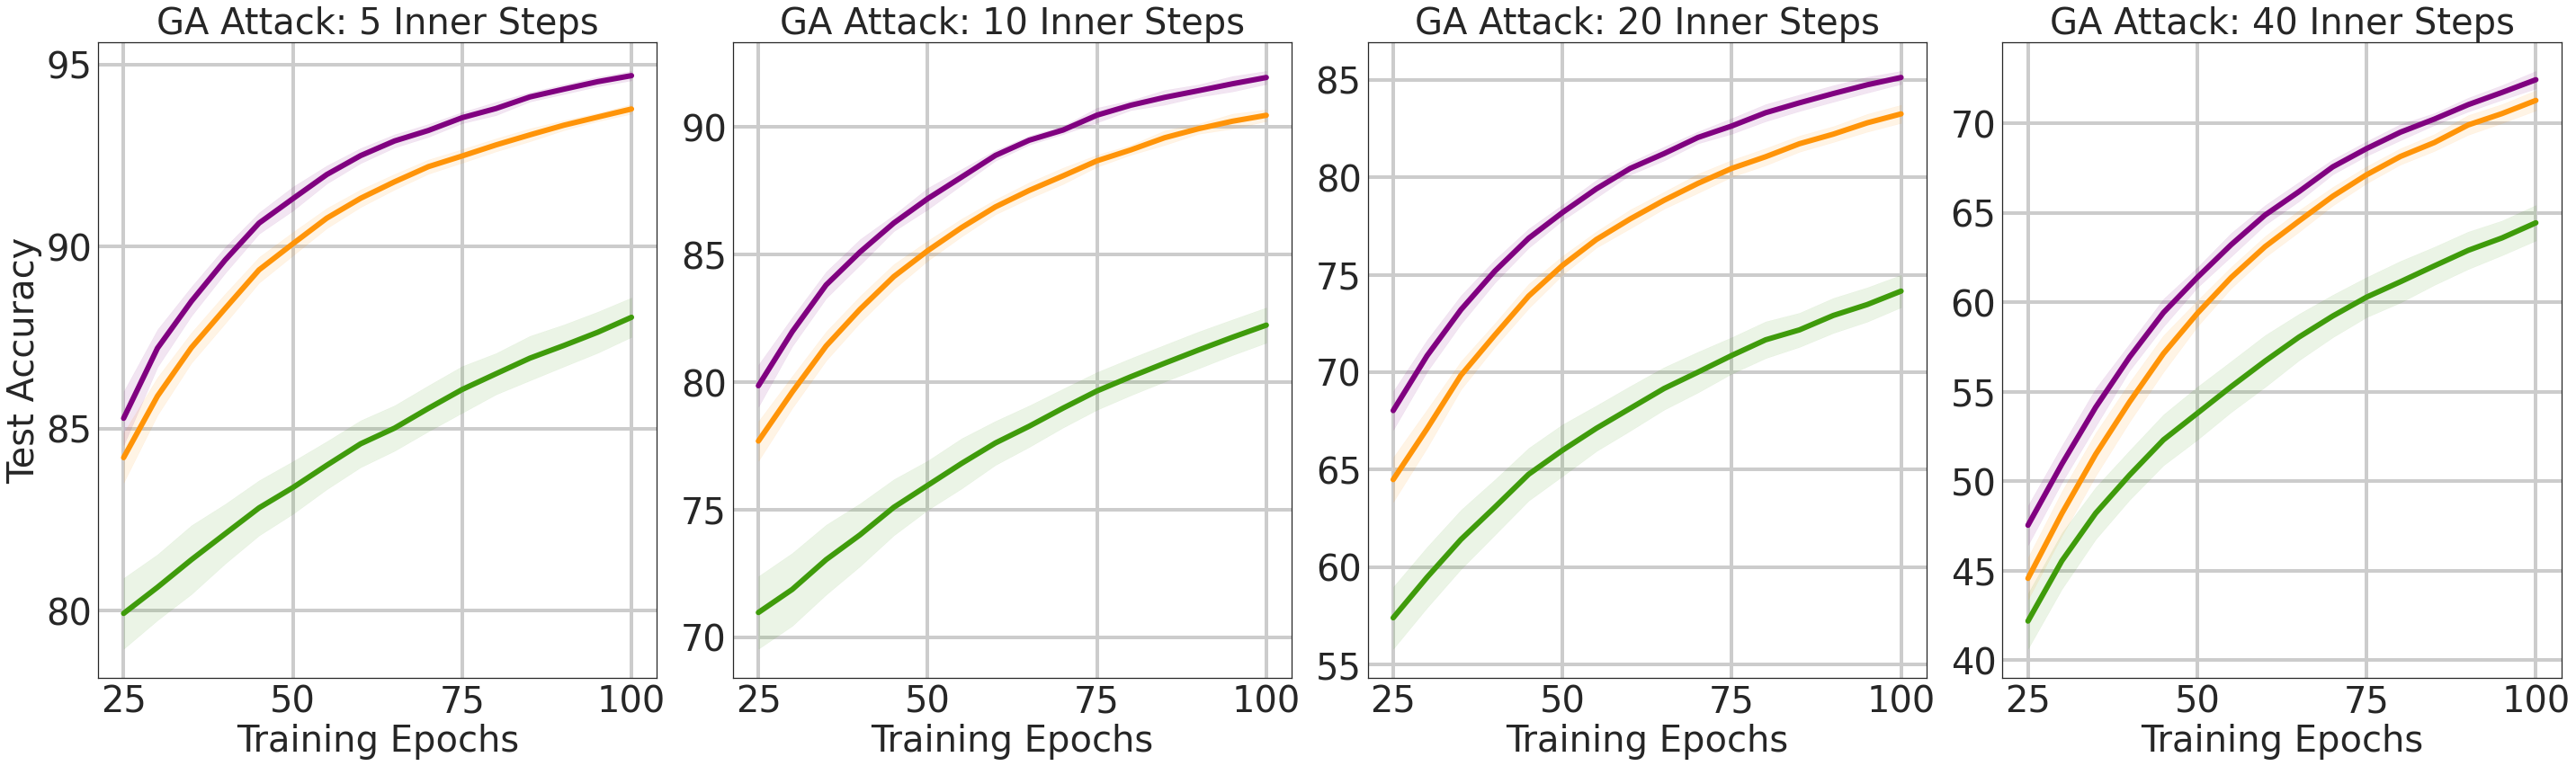

In [5]:
sims = ['minmax_10_1_normal_sgd_100', 'minmax_10_1_no_higher_sgd_100', 'minmax_10_1_higher_sgd_100']
directories = [os.path.join(os.getcwd(), 'results', alg) for alg in sims]
epoch_list = range(25, 105, 5)
fig, ax = plt.subplots(1, 4, figsize=(40, 12))


for point in range(4):
    min_val = 100
    max_val = 0
    for i, directory in enumerate(directories):
        plot_data_list = []
        for seed in range(1, 6):
            plot_data = []
            # get the data for the pull epoch for the sim
            for epoch_num in epoch_list:
                fi = 'attack_results_' + str(epoch_num) 
                data = pickle.load(open(os.path.join(directory+'_seed_'+str(seed), 'attack_results', fi), 'rb'))
                plot_data.append(data['gd'][1][point])
            plot_data_list.append(np.array(plot_data))
        plot_data = np.vstack(plot_data_list).mean(axis=0)
        plot_data_std = np.vstack(plot_data_list).std(axis=0)
        if i == 2: color='purple'
        if i== 1: color='xkcd:tangerine'
        if i== 0: color='xkcd:grass green'
        ax[point].plot(epoch_list, plot_data, label=directory.split('/')[-2], lw=lw*1.5, color=color)
        ax[point].fill_between(epoch_list, plot_data-plot_data_std, plot_data+plot_data_std, color=color, alpha=.1)
        min_val = min(min_val, np.min(plot_data))
        max_val = max(max_val, np.max(plot_data))
    ax[point].set_xlabel('Training Epochs', fontsize=fs)
    ax[point].set_title("GA Attack: %s Inner Steps"%str(data['gd'][0][point]), fontsize=fs)
    ax[point].tick_params(labelsize=fs)
    ax[point].set_xticks([25, 50, 75, 100])
    ax[point].set_yticks(np.arange(5*round(min_val/5), 5*round(max_val/5)+5, 5))
#         ax[point].set_ylim([60, 100])
#plt.legend()
ax[0].set_ylabel("Test Accuracy", fontsize=fs)
plt.subplots_adjust(wspace=.05, hspace=0)
plt.tight_layout()
plt.savefig('attack_results_all.png', bbox_inches='tight', dpi=200)
plt.show()

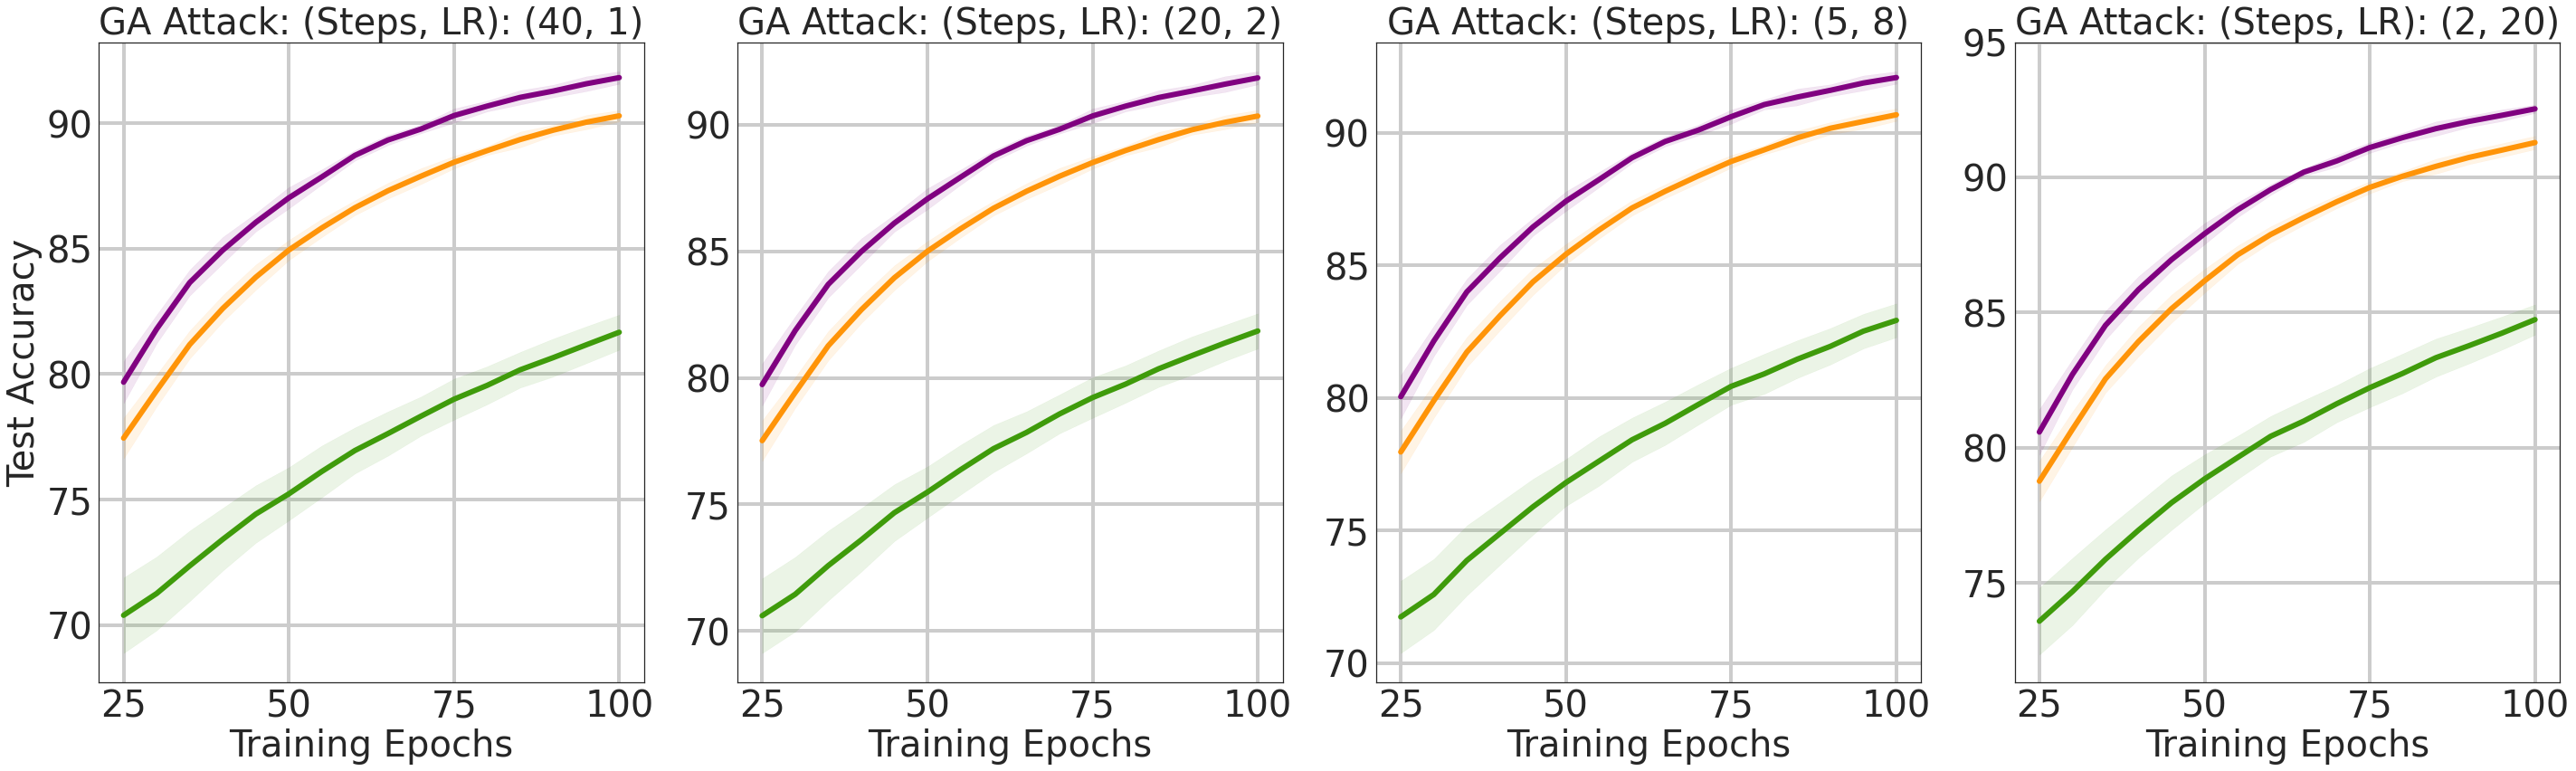

In [11]:
sims = ['minmax_10_1_normal_sgd_100', 'minmax_10_1_no_higher_sgd_100', 'minmax_10_1_higher_sgd_100']
directories = [os.path.join(os.getcwd(), 'results', alg) for alg in sims]
epoch_list = range(25, 105, 5)
fig, ax = plt.subplots(1, 4, figsize=(40, 12))


for point in range(4):
    min_val = 100
    max_val = 0
    for i, directory in enumerate(directories):
        plot_data_list = []
        for seed in range(1, 6):
            plot_data = []
            # get the data for the pull epoch for the sim
            for epoch_num in epoch_list:
                fi = 'budget_attack_results_' + str(epoch_num) 
                data = pickle.load(open(os.path.join(directory+'_seed_'+str(seed), 'attack_results', fi), 'rb'))
                plot_data.append(data['gd'][2][point])
            plot_data_list.append(np.array(plot_data))
        plot_data = np.vstack(plot_data_list).mean(axis=0)
        plot_data_std = np.vstack(plot_data_list).std(axis=0)
        if i == 2: color='purple'
        if i== 1: color='xkcd:tangerine'
        if i== 0: color='xkcd:grass green'
        ax[point].plot(epoch_list, plot_data, label=directory.split('/')[-2], lw=lw*1.5, color=color)
        ax[point].fill_between(epoch_list, plot_data-plot_data_std, plot_data+plot_data_std, color=color, alpha=.1)
        min_val = min(min_val, np.min(plot_data))
        max_val = max(max_val, np.max(plot_data))
    ax[point].set_xlabel('Training Epochs', fontsize=fs)
    ax[point].set_title("GA Attack: (Steps, LR): (%s, %s)"%(str(data['gd'][1][point]), str(data['gd'][0][point])), fontsize=fs)
    ax[point].tick_params(labelsize=fs)
    ax[point].set_xticks([25, 50, 75, 100])
    ax[point].set_yticks(np.arange(5*round(min_val/5), 5*round(max_val/5)+5, 5))
#         ax[point].set_ylim([60, 100])
#plt.legend()
ax[0].set_ylabel("Test Accuracy", fontsize=fs)
plt.subplots_adjust(wspace=.05, hspace=0)
plt.tight_layout()
plt.savefig('budget_attack_results_all.png', bbox_inches='tight', dpi=200)
plt.show()

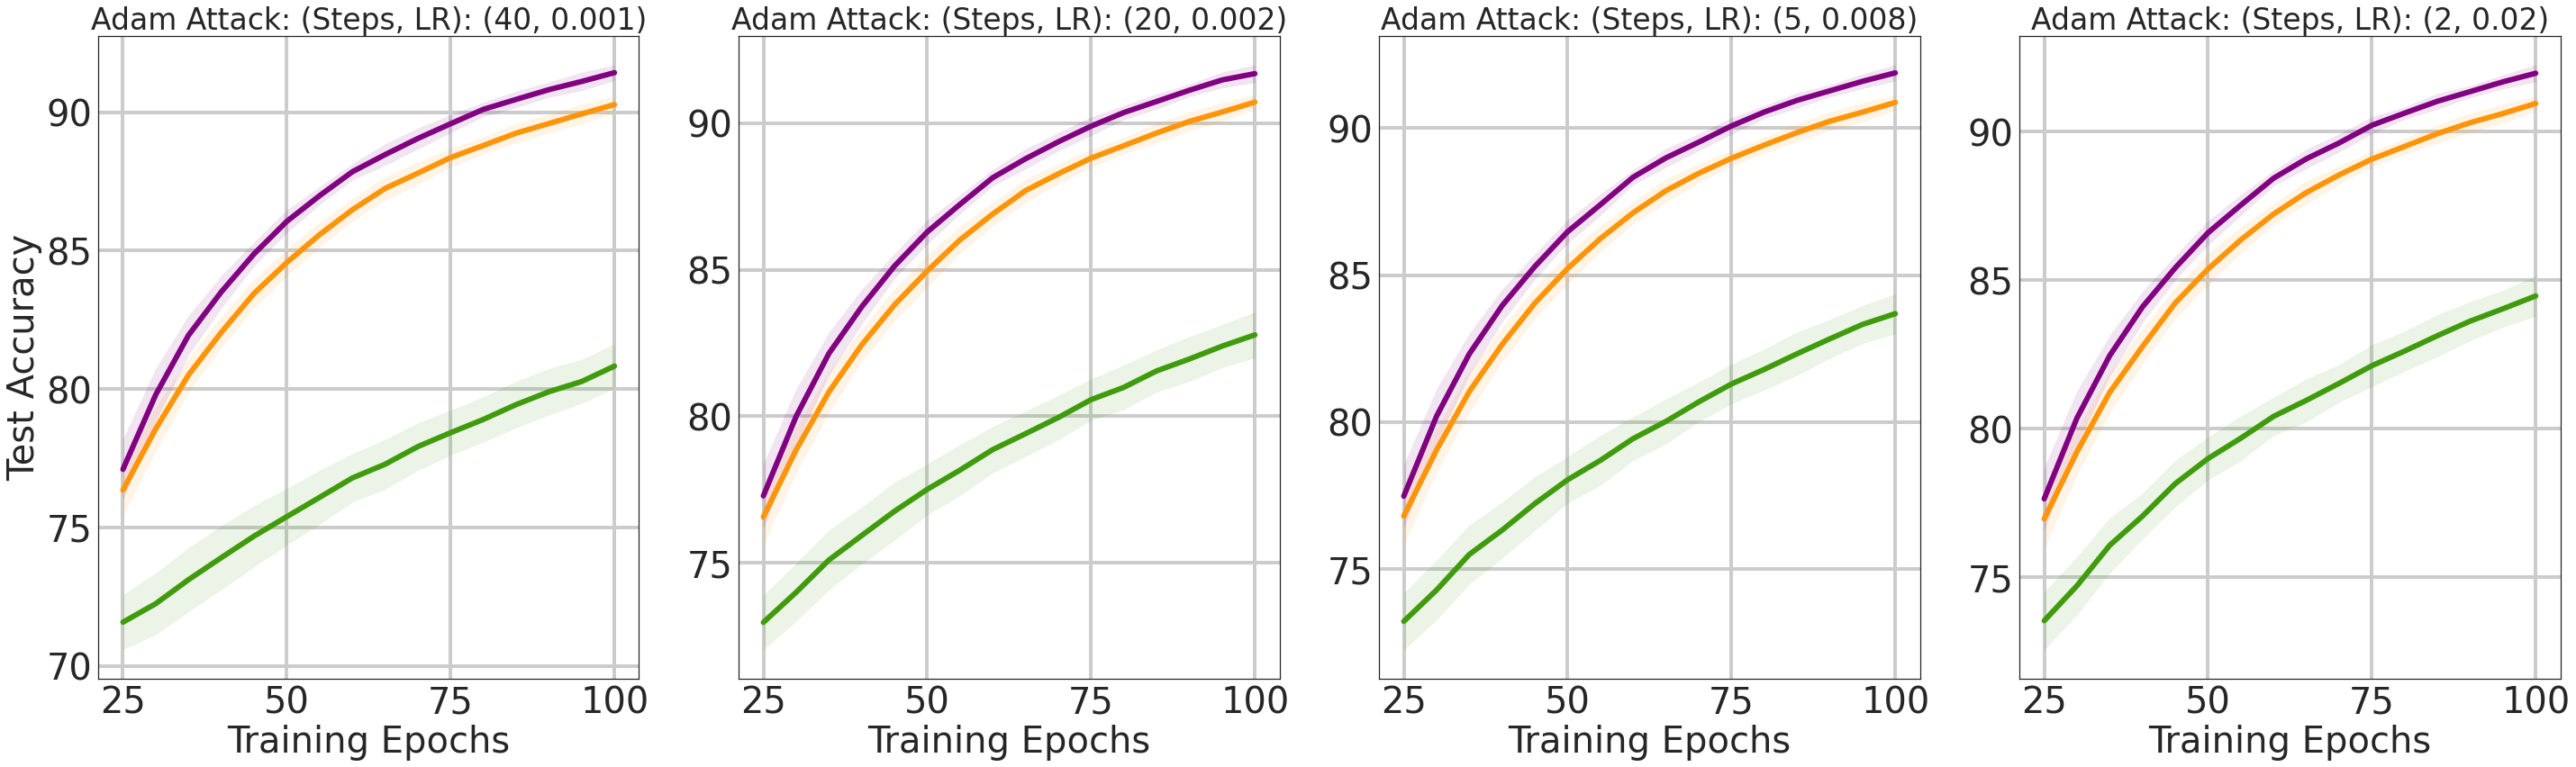

In [12]:
sims = ['minmax_10_1_normal_sgd_100', 'minmax_10_1_no_higher_sgd_100', 'minmax_10_1_higher_sgd_100']
directories = [os.path.join(os.getcwd(), 'results', alg) for alg in sims]
epoch_list = range(25, 105, 5)
fig, ax = plt.subplots(1, 4, figsize=(40, 12))


for point in range(4):
    min_val = 100
    max_val = 0
    for i, directory in enumerate(directories):
        plot_data_list = []
        for seed in range(1, 6):
            plot_data = []
            # get the data for the pull epoch for the sim
            for epoch_num in epoch_list:
                fi = 'budget_adam_attack_results_' + str(epoch_num) 
                data = pickle.load(open(os.path.join(directory+'_seed_'+str(seed), 'attack_results', fi), 'rb'))
                plot_data.append(data['adam'][2][point])
            plot_data_list.append(np.array(plot_data))
        plot_data = np.vstack(plot_data_list).mean(axis=0)
        plot_data_std = np.vstack(plot_data_list).std(axis=0)
        if i == 2: color='purple'
        if i== 1: color='xkcd:tangerine'
        if i== 0: color='xkcd:grass green'
        ax[point].plot(epoch_list, plot_data, label=directory.split('/')[-2], lw=lw*1.5, color=color)
        ax[point].fill_between(epoch_list, plot_data-plot_data_std, plot_data+plot_data_std, color=color, alpha=.1)
        min_val = min(min_val, np.min(plot_data))
        max_val = max(max_val, np.max(plot_data))
    ax[point].set_xlabel('Training Epochs', fontsize=fs)
    ax[point].set_title("Adam Attack: (Steps, LR): (%s, %s)"%(str(data['adam'][1][point]), str(data['adam'][0][point])), fontsize=int(fs/1.2))
    ax[point].tick_params(labelsize=fs)
    ax[point].set_xticks([25, 50, 75, 100])
    ax[point].set_yticks(np.arange(5*round(min_val/5), 5*round(max_val/5)+5, 5))
#         ax[point].set_ylim([60, 100])
#plt.legend()
ax[0].set_ylabel("Test Accuracy", fontsize=fs)
plt.subplots_adjust(wspace=.05, hspace=0)
plt.tight_layout()
plt.savefig('adam_budget_attack_results_all.png', bbox_inches='tight', dpi=200)
plt.show()

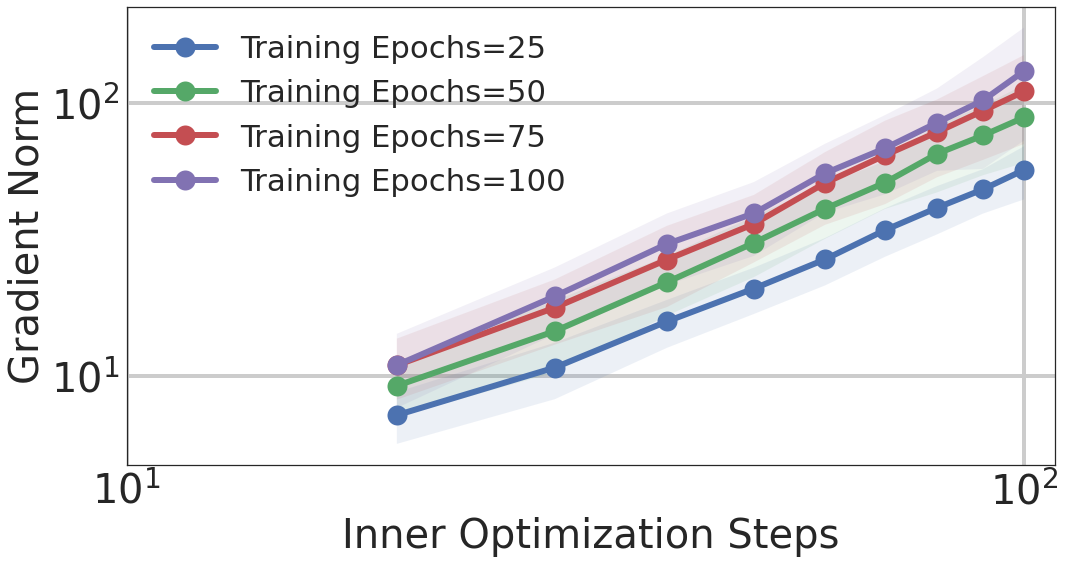

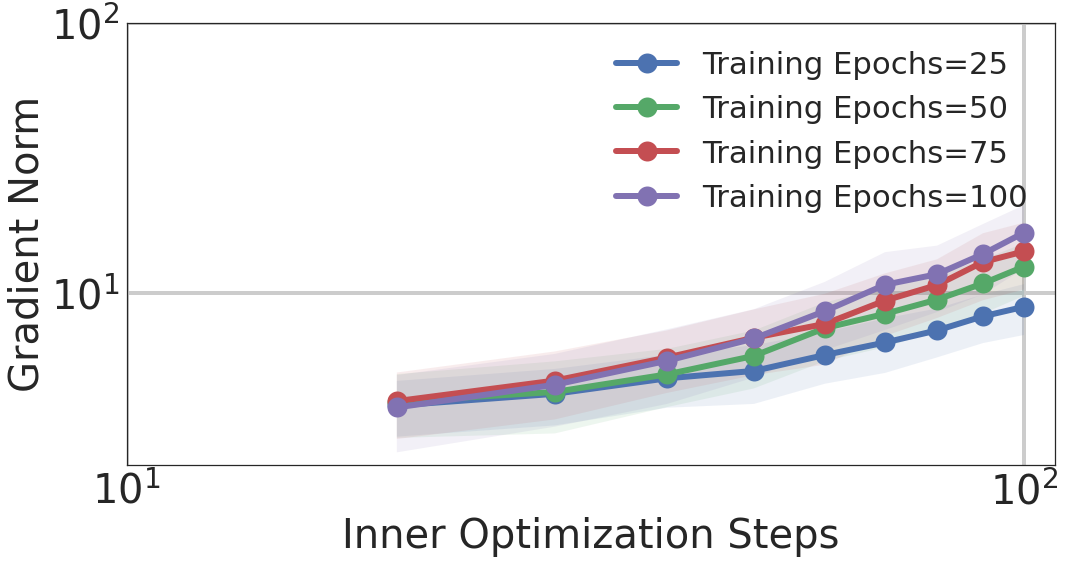

In [21]:
seed = 1
sim = 'minmax_10_1_higher_sgd_100'
folder = os.path.join(os.getcwd(), 'results', sim+'_seed_'+str(seed))

means_list = []
stds_list = []
for epoch in range(25, 125, 25):
    fi = os.path.join(folder, 'grad_norm_results', 'grad_norm_results_'+str(epoch))
    norms = pickle.load(open(fi, "rb"))
    means = [np.mean(norms[i]) for i in range(len(norms))]
    stds = [np.std(norms[i]) for i in range(len(norms))]
    means_list.append(means[2:])
    stds_list.append(stds[2:])

plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
#fig, ax = plt.subplots(1, 1, figsize=(15, 8))
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
training_epochs = [25, 50, 75, 100]
x_range = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100][2:]
for i in range(len(means_list)):
    ax.plot(x_range, means_list[i], '-o', lw=lw*1.5, ms=20, label='Training Epochs=%d'%training_epochs[i])
    ax.fill_between(x_range, np.array(means_list[i])-np.array(stds_list[i]), 
                     np.array(means_list[i])+np.array(stds_list[i]), alpha=.1)
    #ax.errorbar([5, 10, 20, 40, 80], np.array(means_list[i]), yerr=np.array(stds_list[i]))
#ax.plot(x_range, np.array(x_range), '--', lw=6, color='black', label='$f(x)=x$')
#ax.plot(x_range, np.array(x_range)**2, ':',lw=6, color='black', label='$f(x)=x^2$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([10, 100])
ax.set_xlabel('Inner Optimization Steps', fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_ylabel("Gradient Norm", fontsize=fs)
plt.legend(fontsize=fs/1.3)
plt.tight_layout()
plt.savefig('grad_norm_small.png', bbox_inches='tight', dpi=200)
plt.show()

seed = 1
sim = 'minmax_10_1_higher_sgd_100'
folder = os.path.join(os.getcwd(), 'results', sim+'_seed_'+str(seed))

means_list = []
stds_list = []
for epoch in range(25, 125, 25):
    fi = os.path.join(folder, 'grad_norm_results', 'grad_norm_results_1.0_'+str(epoch))
    norms = pickle.load(open(fi, "rb"))
    means = [np.mean(norms[i]) for i in range(len(norms))]
    stds = [np.std(norms[i]) for i in range(len(norms))]
    means_list.append(means[2:])
    stds_list.append(stds[2:])

plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
training_epochs = [25, 50, 75, 100]
x_range = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100][2:]
for i in range(len(means_list)):
    ax.plot(x_range, means_list[i], '-o', lw=lw*1.5, ms=20, label='Training Epochs=%d'%training_epochs[i])
    ax.fill_between(x_range, np.array(means_list[i])-np.array(stds_list[i]), 
                     np.array(means_list[i])+np.array(stds_list[i]), alpha=.1)
    #ax.errorbar([5, 10, 20, 40, 80], np.array(means_list[i]), yerr=np.array(stds_list[i]))
#ax.plot(x_range, .01*np.array(x_range), '--', lw=6, color='black', label='$f(x)=x$')
#ax.plot(x_range, .01*np.array(x_range)**2, ':',lw=6, color='black', label='$f(x)=x^2$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([10, 100])
ax.set_yticks([10, 100])
ax.set_xlabel('Inner Optimization Steps', fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_ylabel("Gradient Norm", fontsize=fs)
plt.legend(fontsize=fs/1.3)
plt.tight_layout()
plt.savefig('grad_norm_small_2.png', bbox_inches='tight', dpi=200)
plt.show()